# Regression Analysis

- so far, we've learned the main concepts behind supervised learning and trained many models for classification tasks to predict group memberships or categorial variables
- regression models are used to predict target variable on a continuous scale
- some important applications are:
    1. predicting insurance premium
    2. making weather forecast
    3. predicting stock market
    4. predicting housing market
    5. predicting sales of a company in future month, etc.

- In this notebook, we will discuss the main concepts of regression models and cover the following topics:
    - Exploring and visualizing datasets
    - Looking at different approaches to implement linear regression models
    - Training regression models that are robust to outliers
    - Evaluating regression models and diagnosing common problems
    - Fitting regression models to nonlinear data
    
## Linear regression
- the goal of linear regression is to model the relationship between one or multiple features and a continuous target variable

### Simple linear regression
- the goal of simple (**univariate**) linear regression is to model the relationship between a single feature (**explanatory variable**, *x*) and a continuous-valued **target (response variable**, *y*) 
- the equation of a linear model with one explanatory variable is defined as follows:
    - $y = w_0 + w_1x$
        - $w_0$ is the $y$ axis incercept
        - $w_1$ is the weight coefficient independent variable
- the goal is to learn the weights of the linear equation to describe the relationship between the independent variable and the target variable
- the learned weights can be used predict responses of new samples
- visusally, linear regression can be understood as finding the best-fitting straight line through the training example, as shown in the following figure
![Linear Regression](./images/linear-reg-1.png)
- the best-fitting line is also called the regression line
- the vertical lines from the regression line to the training examples are the **offsets** or **residual** -- the errors of our prediction

### Multiple linear regression
- generalizing the linear regression model to multiple explanatory variables

    - $y = w_0 x_0 + w_1 x_1 + w_nx_x = \sum_{i=0}^{n}w_i x_i = w^T x$

- visualizing 2-d, fitted hyperplane of a multiple linear regression model with two features is already difficult
![Multiple linear regression](./images/multiple-linear-reg.png) 
- due to the challenge and limitations of visualizing multiple linear regression hyperplanes in dataset with more than 2 features, we'll focus on univariate case, using simple regression models

### Solving regression for regression parameters with gradient descent

- [YouTube Video](https://www.youtube.com/watch?v=sDv4f4s2SB8)

## Exploring the Ames Housing Dataset

- individual residential property in Ames, Iowa, from 2006 to 2010
- collected by Dean De Cock in 2011
- a report describing the dataset: http://jse.amstat.org/v19n3/decock.pdf
- detailed documentation regarding the dataset’s features: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- The dataset in a tab-separated format: http://jse.amstat.org/v19n3/decock/AmesHousing.txt

## Loading the Ames Housing dataset into a DataFrame

- dataset consists of 2,930 examples and 80 features
- for simplicity we'll only work with a subset of features:
- `Overall Qual`: Rating for the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent)
- `Overall Cond`: Rating for the overall condition of the house on a scale from 1 (very poor) to 10 (excellent)
- `Gr Liv Area`: Above grade (ground) living area in square feet
- `Central Air`: Central air conditioning (N=no, Y=yes)
- `Total Bsmt SF`: Total square feet of the basement area
- `SalePrice`: Sale price in U.S. dollars `$`


In [ ]:
import pandas as pd
import numpy as np

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
'Central Air', 'Total Bsmt SF', 'SalePrice']

In [ ]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
    sep='\t',
    usecols=columns)

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
# let's encode Central air column with 1 and 0
df['Central Air'] = df['Central Air'].map({'N':0, 'Y': 1})

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
# remove the sample with null value
df = df.dropna(axis=0)

In [ ]:
df.isnull().sum()

## Visualize the important characteristics of a dataset

- **Exploratory data analysis (EDA)** allows us to visually detect the presence of outliers, distribution of the data, and the relationships between features
- let's create **scatterplot matrix** that allows us to visualize the pair-wise correlations between the different features in one place
- due to space constraint, we'll use some selected columns
    - feel free to explore all...
- `mlxtend` package or `seaborn` package can be used for plotting

In [ ]:
! pip install mlxtend

In [70]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

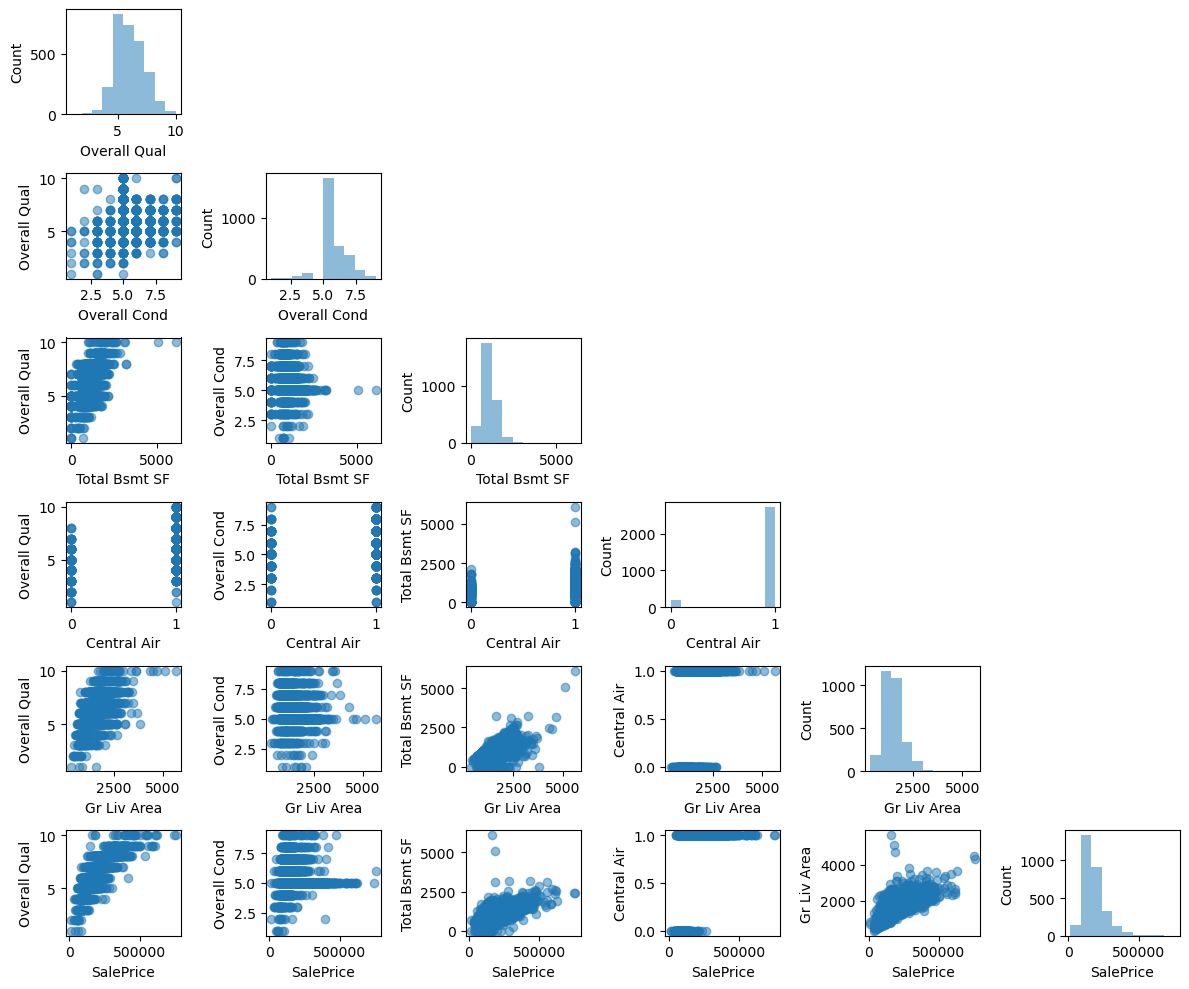

In [71]:
scatterplotmatrix(df.values, figsize=(12, 10),
                names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

- eyeball some observations:
    - diagonal charts are just histogram distribution of each feature on x-axis
    - there's a linear relationship between area above ground `Gr Lib Area` and `Sale Price` bottom row 5th column
    - the MEDV feature seems to be normally distributed but contains several outliers

## Looking at relationships using a correlation matrix
- let's create a correlation matrix to quantify and summarize linear relationships between variables
- the correlation matrix is a square matrix that contains the Pearson product-moment correlation coefficient (often abbreviated as Pearson's r) which measures the linear dependence between pairs of features
    - textbook provides the equation to calculate Pearson's correlation
- the Pearson's correlation coefficients are in the range -1 to 1
- two features have a perfect positive correlation if r = 1,
    - no correlation if r = 0, and 
    - a perfect negative correlation if r = –1
- we'll use MLxtend library (https://rasbt.github.io/mlxtend/) to plot the heatmap of the Pearson's correlation matrix

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
import numpy as np

In [ ]:
cm = np.corrcoef(df.values.T)

In [ ]:
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

- looking at the correlation matrix, `Gr Liv Area` shows the 2nd largest correlation (0.71) with the target variable `Sale Price`
- `Gr Liv Area` feature seems to be a good choice for an exploratory variable to introduce the concept of a simple linear regression model

## Implementing an ordinary least squares linear regression model

- linear regression can be understood as obtaining the best-fitting straight line through the examples of training data
- we'll implement **ordinary least squares (OLS)** method or **linear least squares** to estimate the parameters of linear regression line that minimizes the sum of the squared vertial distances (residuals or errors)

## Solving regression for regression parameters with gradient descent

- we'll adapt Adaline (Adaptive Linear Neuron)
- we minimize the loss function `L(w)` = **mean squared error (MSE)**
- MSE is minimized to learn the optimal weights via optimization algorithms such as **gradient descent (GD) and stochastic gradient descent (SGD)**
    - in SGD, random sample of training data is used to update the model's parameters instead of whole dataset

### Mean Squared Error (MSE)
- useful quantitative measure of regressor models' performance
- simply the averaged value of the Sum of Squared Errors (SSE)
    - $MSE = L(w, b) = \frac{1}{2n}\sum_{i=1}^{n}(y^{(i)}-\hat y^{(i)})^2$
- Note:    
    - $\hat y$ is the predicted value $\hat y = w^Tx + b$
    - the term $\frac{1}{2}$ is just used for convenience to derive the update rule of GD


In [ ]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return self.net_input(X)
    

In [20]:
X = df[['Gr Liv Area']].values

In [21]:
y = df['SalePrice'].values

In [22]:
# standarize the variables for better convergence of the GD algorithm
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
# convert y to 2-d and flatten back to 1-d; workaround...
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [23]:
lr_gd = LinearRegressionGD(eta=0.1)
lr_gd.fit(X_std, y_std)

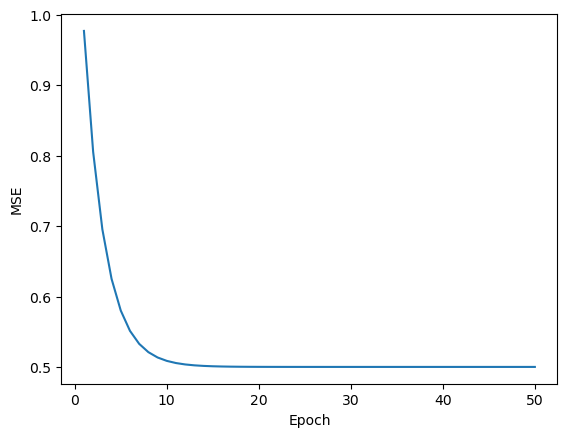

In [24]:
plt.plot(range(1, lr_gd.n_iter+1), lr_gd.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

### plot the regression line

- the best fitting line on the dataset

In [18]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

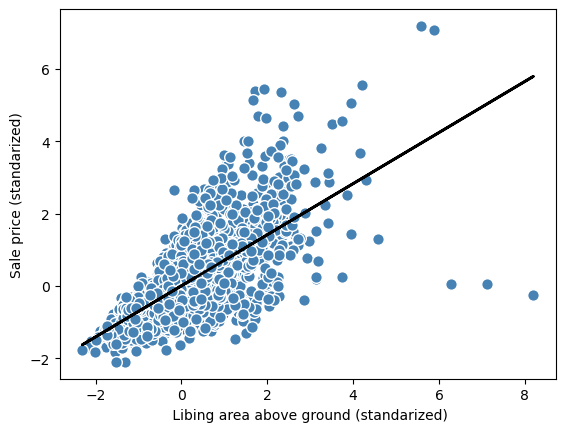

In [19]:
lin_regplot(X_std, y_std, lr_gd)
plt.xlabel(' Libing area above ground (standarized)')
plt.ylabel('Sale price (standarized)')
plt.show()

In [25]:
# let's see how the model predicts a house with 2500 living sq. footage
# we'll transform the feature
# scale the predicted prices back onto the original price in USD
feature_std = sc_x.transform(np.array([[2_500]]))
target_std = lr_gd.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))

In [26]:
import locale # currency formatting
locale.setlocale(locale.LC_ALL, 'en_CA.UTF-8') # set US locale

'en_CA.UTF-8'

In [27]:
print(f'Sales price: {locale.currency(target_reverted.flatten()[0], grouping=True )}')

Sales price: $292,507.07


In [28]:
# on a side note; we don't have to update intercept parameter or bias unit, b
# it's always 0 for standarized variables
print(f'Slope: {lr_gd.w_[0]:.3f}')

Slope: 0.707


In [29]:
print(f'Intercept: {lr_gd.b_[0]:.3f}')

Intercept: -0.000


## Estimating the coefficient of a regression model via Scikit-learn

- let's use scikit-learn's LinearRegression API

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
slr = LinearRegression()
# unstandarized variables
slr.fit(X, y)
y_pred = slr.predict(X)

In [32]:
print(f'Slope, w0: {slr.coef_[0]:.3f}')

Slope, w0: 111.666


In [33]:
print(f'Intercept: {slr.intercept_:.3f}')

Intercept: 13342.979


### plotting the regression line

- two models have different slope and intercepts
- however, let's see the best fitting line on the dataset

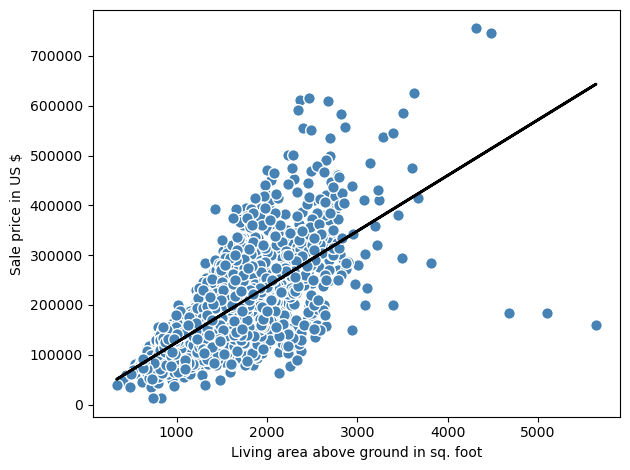

In [34]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in sq. foot')
plt.ylabel('Sale price in US $')
plt.tight_layout()
plt.show()

### Fitting a robust regression model using RANSAC
- Linear regression models can be heavily impacted by the presence of outliers
- outliers can be detected and removed; however, requires judgement as data scientist and the domain knowledge
- alternative to throwing outliers is using the RANSAC - RANdom SAmple Consensus algorithm
    - fits a regression model to a subset of the data (**inliers**)

- We can summarize the iterative RANSAC algorithm as follows:
    1. Select a random number of examples to be inliers and fit the model.
    2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
    3. Refit the model using all inliers.
    4. Estimate the error of the fitted model versus the inliers.
    5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations were reached; go back to step 1 otherwise.
    
- use RANSACRegression API of scikit-learn - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html

In [35]:
from sklearn.linear_model import RANSACRegressor

In [36]:
ransac = RANSACRegressor(LinearRegression(), max_trials=100, #default
                        min_samples=0.95,
                        loss='absolute_error',
                        residual_threshold=None, # default
                        random_state=123)

In [37]:
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

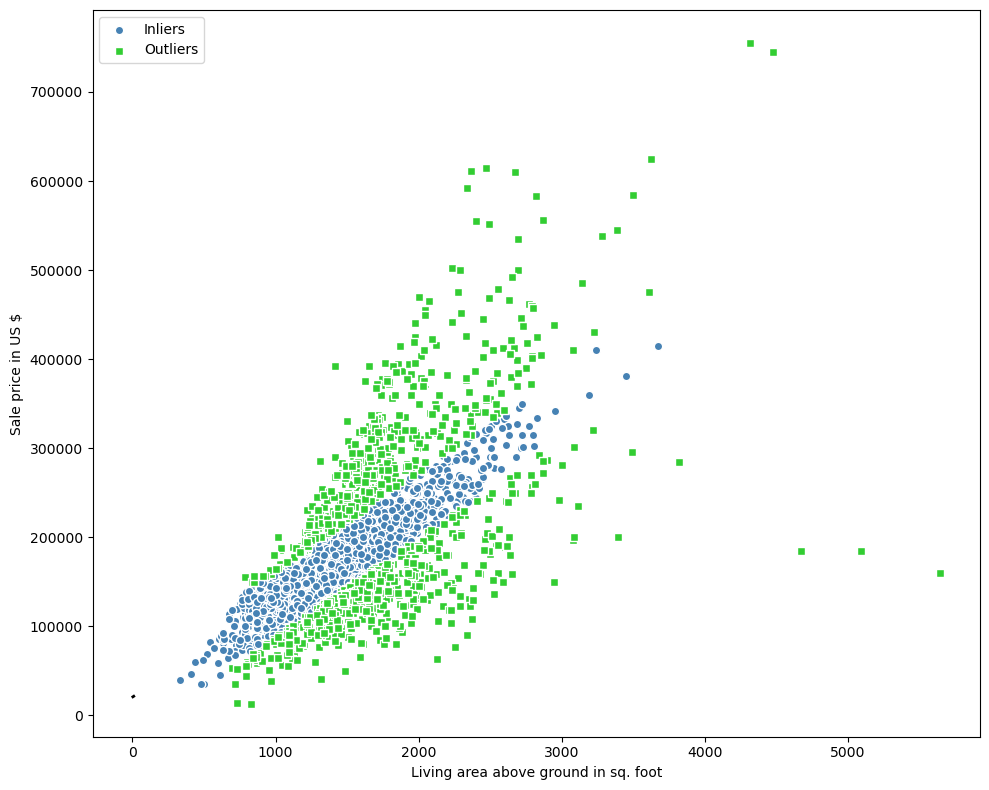

In [38]:
# let's obtain the inliers and outliers from the fitted ransac
# plot them with the linear fit
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers') 
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers') 
plt.plot(line_X, line_y_ransac, color='black', lw=2) 
plt.xlabel('Living area above ground in sq. foot') 
plt.ylabel('Sale price in US $') 
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')
# we get a slightly different slope and intercept compared to straight linear regression

Slope: 106.348
Intercept: 20190.093


In [40]:
# when residual_threshold parameter is set to None
# RANSAC uses the MAD - mean absolute deviation calculated as
def mean_absolute_deviation(data):
    return np.mean(np.abs(data - np.mean(data)))

In [41]:
mean_absolute_deviation(y)

58269.561754979375

In [42]:
# if we want to identify fewer data points as outliers,
# we can use higher residual threshold; e.g. 65,000
ransac1 = RANSACRegressor(LinearRegression(), max_trials=100, #default
                        min_samples=0.95,
                        loss='absolute_error',
                        residual_threshold=65_000,
                        random_state=123)

In [43]:
ransac1.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123, residual_threshold=65000)

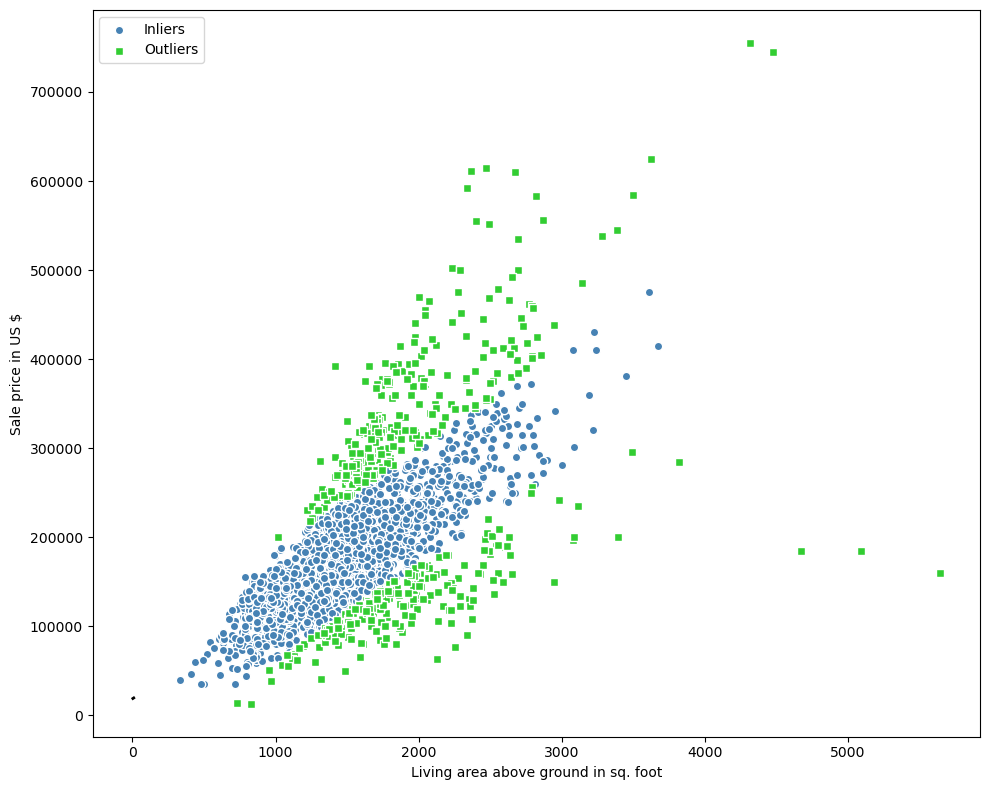

In [44]:
# let's obtain the inliers and outliers from the fitted ransac1
# plot them with the linear fit
inlier_mask = ransac1.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac1.predict(line_X[:, np.newaxis])

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers') 
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers') 
plt.plot(line_X, line_y_ransac, color='black', lw=2) 
plt.xlabel('Living area above ground in sq. foot') 
plt.ylabel('Sale price in US $') 
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Evaluating the performance of linear regression models using residual plots

- like supervised classifiers, regressors need to be trained on training set and evaluate on test set
- the goal is to evaluate the model's performance on unseen data to estimate the generalization performance
- in order to properly evaluate the model, we'll use all the variables/features in the dataset
- since our model uses multiple explanatory variables, we can't visualize the linear regression line or hyperplane
- residual plots lets us visualize the residual (differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model
- the following code plots a residual plot by simply subtracting the true target value from predicted responses

In [47]:
df.columns

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air',
       'Gr Liv Area', 'SalePrice'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=123)

In [49]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

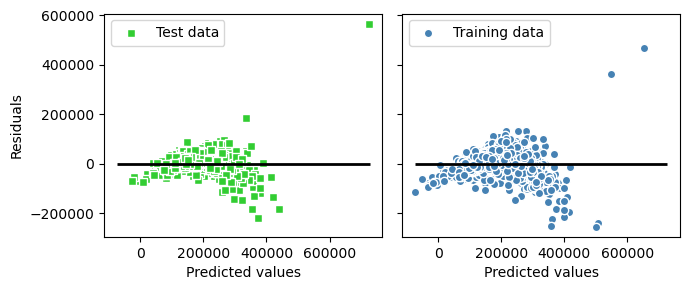

In [50]:
x_max = np.max(
    [np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min(
    [np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(
    y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s',
    edgecolor='white',
    label='Test data')
ax2.scatter(
    y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,\
    color='black', lw=2)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train {mse_train:.3f} test: {mse_test:.3f}')

MSE train 1497216245.853 test: 1516565820.999


### Mean Absolute Error (MAE)
- mean absolute error emphasizes incorrect prediction slighly less

$MAE = \frac{1}{n}\sum_{i=1}^{n}|y^{(i)}-\hat y^{(i)}|$

In [53]:
# calculate the root mean squared error or mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

In [54]:
print(f'MAE train: {mae_train:.2f}')

MAE train: 25983.03


In [55]:
print(f'MAE test: {mae_test:.2f}')

MAE test: 24921.29


## Interpreting errors

- if the difference in train and test mean squared errors (MSE) is big, means the model is overfitting the training data
- the interpretration of MSE depends on the dataset and feature scaling
- e.g., if the house prices were represented as multiples of 1,000 (with K suffix), the same model would yield a lower MSE compared to a model that worked with unscaled features
    - $(10K - 15K)^2 < (10,000 - 15,000)^2$
    
### Coefficient of determination ($R^2$)
- standarized version of the MSE for better interpretation of the MSE
- $R^2$ is the fraction of response variance captured by the model
     
     $R^2 = 1 - \frac {SSE}{SST}$

- **SSE** is the sum of squared errors, which is similar to the MSE but does not include the normalization by sample size n:

    $SSE = \sum_{i=1}^{n}(y^{(i)} - \hat y^{(i)})^2$
    
- and **SST** is the total sum of squares:

    $SST = \sum_{i=1}^{n}(y^{(i)} - \mu_{y})^2$

- $R^2$ is the rescaled version of MSE

    $R^2 = 1 - \frac {MSE}{Var(y)}$
    
- higer the $R^2$, better the prediction meaning lesser the error
- if $R^2 = 1$, the model fits the data perfectly with a $MSE = 0$

In [56]:
from sklearn.metrics import r2_score

In [57]:
print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.769, test: 0.752


## Turning a linear regression model into a curve - polynomial regression
- linearity assumption in data can be violated with polynomial regression model by adding polynomial terms:

    - $y=w_1x+w_2x^2 + ... + w_nx^d + b$
    - $d$ denotes the degree of the polynomial
- although we can use ploynomial regression to model nonlinear relationshop, it is still considered a multiple linear regression model because of regression coefficients, $w$

## Adding ploynomial terms
- can use `PolynomialFeatures` trasformer in scikit-learn to add a quadratic term (degree = 2)
- compare the linear with the polynomial fit

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
# create a toy dataset
X_train = np.array([258.0, 270.0, 294.0, 320.0, 342.0,
              368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

In [60]:
X_train

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

In [61]:
y_train = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [62]:
y_train

array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368. , 391.2,
       390.8])

In [63]:
# add a second degree polynomial term
quadratic = PolynomialFeatures(degree=2) 
X_quad = quadratic.fit_transform(X_train)

In [64]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [65]:
# fit a simple linear regression model for comparison
lr = LinearRegression()
# fit linear features
lr.fit(X_train, y_train)
X_test = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_test = lr.predict(X_test)

In [66]:
# fit quadratic features
pr = LinearRegression()
pr.fit(X_quad, y_train)
y_quad_test = pr.predict(quadratic.fit_transform(X_test))

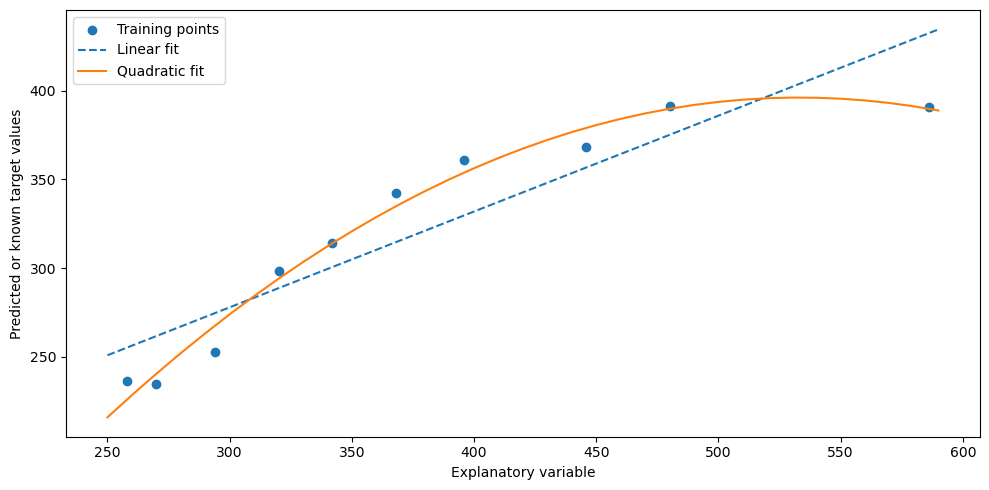

In [67]:
# plot results
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X_train, y_train, label='Training points')
plt.plot(X_test, y_lin_test, label='Linear fit', linestyle='--')
plt.plot(X_test, y_quad_test, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/10_11.png', dpi=300)
plt.show()

In [68]:
# find the MSE and R^2
y_lin_pred = lr.predict(X_train)
y_quad_pred = pr.predict(X_quad)

In [69]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y_train, y_lin_pred),
        mean_squared_error(y_train, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y_train, y_lin_pred),
        r2_score(y_train, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modeling nonlinear relationships in the Ames Housing dataset

- let's model the relationship between the sale prices and the living area above ground
- compare second-degree (quadratic) and third-degree (cubic) polynomaials with the linear fit

In [72]:
# use just one feature LSTAT as an explanatory feature
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values # target variable

In [73]:
# remove the three outliers with a living area ggreater than 4,000 sq. ft
X = X[(df['Gr Liv Area'] < 4000)]

In [74]:
y = y[(df['Gr Liv Area'] < 4000)]

In [75]:
regr = LinearRegression()

In [76]:
# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [77]:
# test data
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

In [78]:
# fit linear features
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [79]:
# fit quadratic features
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [80]:
# fit cubic features
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

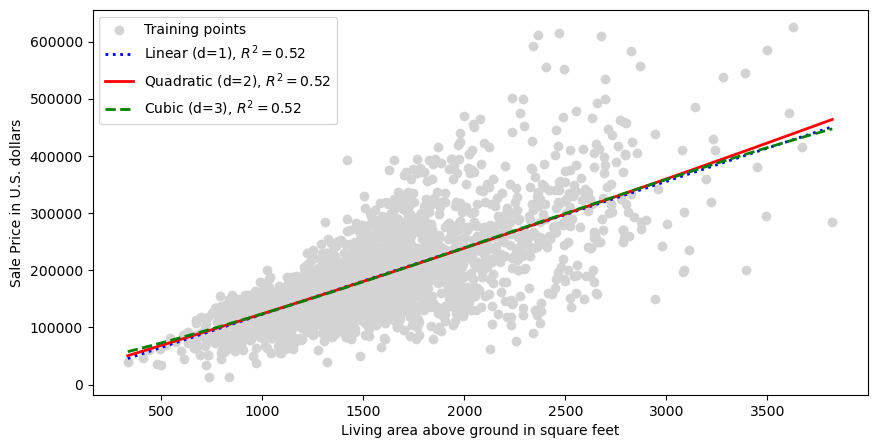

In [81]:
# plot results
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale Price in U.S. dollars')
plt.legend(loc='upper left')

plt.show()

- the above figure shows using quadratic or cubic features doesn't have an effect
- the relationship between the two variables appears to be linear 

### other transformations; other features ?

- sometime you may find other transformations e.g., `Logarithm` working better
- let's look at another feature `Overall Qual`
    - provides overall qualifty of the material and finish of the house (scale value: 1-10)


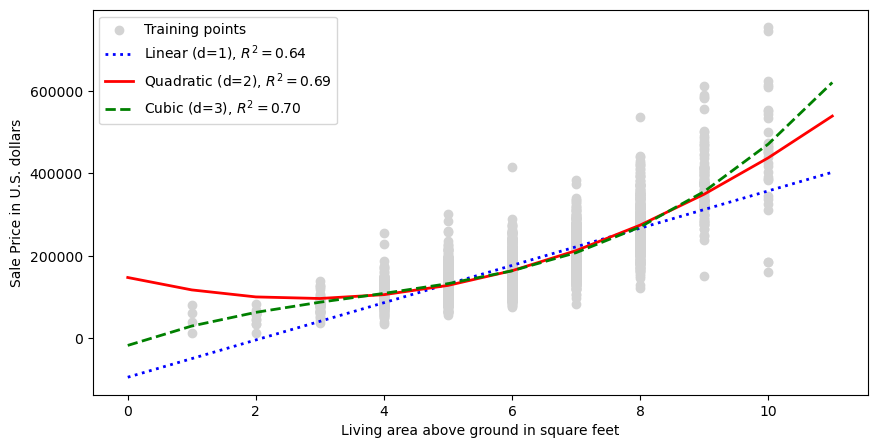

In [82]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# test data
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

# fit linear features
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# fit quadratic features
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# fit cubic features
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale Price in U.S. dollars')
plt.legend(loc='upper left')

plt.show()

## Decision Tree Regressor
- Decision Tree can be used as a regressor model
![DT Regressor](./images/DT-Regressor.png)

- points to note:
    1. no data transformation is required; the feature is analyzed one at a time
    2. DT regressor captures the general trend in the data
    3. doesn't capture the continuity and differentiability of the desired prediction
    4. need to be careful about choosing an appropriate value for the depth of the tree so as to not overfit or underfit the data
    
- let's visualize fitting the regression curve with a decision tree
- the black line in the plot is the predicted value
- the line should be straight - vertical and horizontal not slanting as it doesn't capture the continuity and differentiability of the desired prediction
    - for vertical line, there are two outcomes based on the result of the <= decision on each node

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

In [ ]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [ ]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

### MSE/$R^2$? 

- let's split the dataset into train/test and evaluate the DT Regressor model

In [ ]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
y_train_pred = tree.predict(X_train)

In [ ]:
print('Training MSE linear: %.3f'%
        mean_squared_error(y_train, y_train_pred))
print('Training R^2 linear: %.3f'%
        r2_score(y_train, y_train_pred))

In [ ]:
print('Testing MSE linear: %.3f'%
        mean_squared_error(y_test, y_pred))
print('Testing R^2 linear: %.3f'%
        r2_score(y_test, y_pred))

### Underfitting and Overfitting Decision Tree
- DT Regressor models can suffer from underfit and overfit
- one of the reasons could be "Tree Depth"
- higher the the tree depth, more leaf nodes
    - tree with 10 levels, will have $2^{10} = 1024$ leaves
- leaves with very fewer houses will make predictions that are quite close to those homes' actual values
    - however, they may make unreliable predictions for new data
    - because, each prediction is based on only a few houses
    
![DT under and overfitting](./images/dt-fitting-errors.png)

### Finding the optimal leaf nodes

- Scit-kit learn DT Regressor provides `max_leaf_nodes` argument to control overfitting vs underfitting
- we can use a utility function to help compare MSE scores from models with different `max_leaf_nodes`
- let's traing and test on the whole dataset with all the features

In [ ]:
def get_mse(max_leaf_nodes, X_train, y_train, X_test, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    return mse

In [ ]:
# compare MSE with differing values of max_leaf_nodes
errors = []
for i in range(1, 11, 1):
    max_leaf_nodes = 2**i
    mse_err = get_mse(max_leaf_nodes, X_train, y_train, X_test, y_test)
    print("Max leaf nodes: %d  \t\t Mean Squared Error:  %d" %(max_leaf_nodes, mse_err))
    errors.append((mse_err, max_leaf_nodes))

In [ ]:
mse, optimal_leaves = min(errors)

In [ ]:
print(f'Optimal leaves: {optimal_leaves} MSE: {mse:.3f}')

In [ ]:
# let's find the optimal depth of the tree
import math

In [ ]:
print(f'Optimal depth = {math.floor(math.log2(optimal_leaves))}')

## Random forest regression
- a random forest is an ensemble technique that combines multiple decision trees
- a random forest usually has a better generalization performance than an individual decision tree due to randomness (which helps to decrease the model's variance)
- RF are also less sensitive to outliers and don't require much parameter tuning
- only parameter that could be tuned is number of trees in the forest
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- let's apply `RandomForestRegression` to Housing dataset

In [ ]:
from sklearn.metrics import mean_absolute_error
# use all the features
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=.3, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(random_state=1,
                               n_estimators=1000,
                               criterion='squared_error',
                               n_jobs=-1)

In [ ]:
# train and test the model and find MAE and R^2
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

In [ ]:
# Let's plot the residuals of the predictions
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s', edgecolor='white',
    label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,
    color='black', lw=2)
plt.tight_layout()
plt.show()

### Feature ranking
- both `RandomForestClassifier` and `RandomForestRegressor` provide `feature_importances_` attribute
- the following code displays the ranking and bar charts of each feature based on its importance value
- model trained above is used to demostrate it

In [ ]:
importances = forest.feature_importances_

# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
# return the indices that would sort the importances array and reverse it
indices = np.argsort(importances)[::-1]

# print all the features and their importances in highest to lowest importance
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            features[indices[f]], 
                            importances[indices[f]]))

# plot the histogram bar chart
plt.title('Housing Dataset - Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

## Use top features to train RandomForestRegressor

- use forward selection technique from highest to lowest important feature
- can also use to train and test other regressor models
- left as an exercise